## Demonstration of three-layer feedforward inhibition model

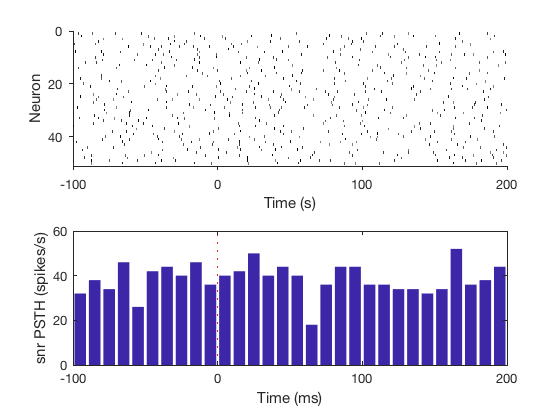

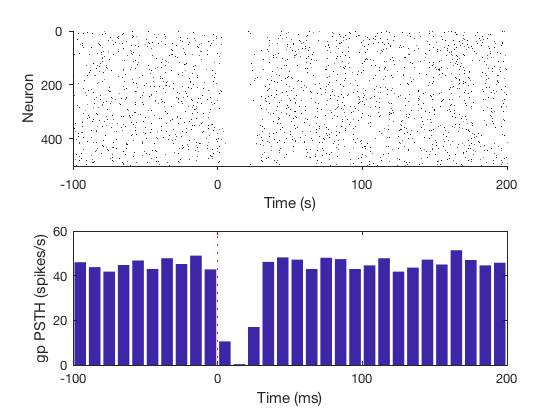

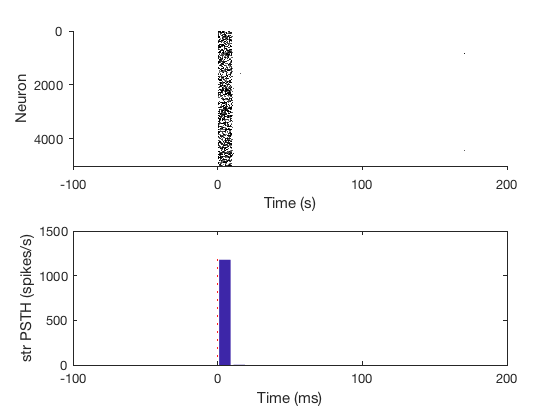

In [9]:
%Runs 3s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

clear spk_snr spk_gp spk_str
dt=0.0001; % 0.1ms integration steps

    parfor l =1:50
        [Vm_gp, Vm_snr, Vm_str] = BGdelayline('stimCellsPer',80,'I_exc_snr',60,'I_exc_gp',60,...
            'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        spk_snr{l,1} = Vm_snr==15;
        spk_gp{l,1} = Vm_gp ==15;
        spk_str{l,1} = Vm_str==15;
    end
    spk_str = double(cell2mat(spk_str));
    spk_snr = double(cell2mat(spk_snr));
    spk_gp = double(cell2mat(spk_gp));

    binWidth = 100; % bin size, scale of 0.1ms

    t_bar = 1:binWidth:length(spk_snr);
    psth_str = zeros(1,length(t_bar));
    psth_snr = zeros(1,length(t_bar));
    psth_gp = zeros(1,length(t_bar));

    for psth_i = 1:length(t_bar)-1
        psth_str(psth_i) = sum(sum(spk_str(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
        psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
        psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

    end
     
figure
subplot(2,1,1)
plotRaster(spk_str)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(2,1,2) 
bar((binWidth/2+t_bar-1)*0.0001,psth_str/(size(spk_str,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
%ylim([0 150])
vline(1)
ylabel('str PSTH (spikes/s)')
xlabel('Time (ms)')

figure
subplot(2,1,1)
plotRaster(spk_gp)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(2,1,2) 
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
%ylim([0 150])
vline(1)
ylabel('gp PSTH (spikes/s)')
xlabel('Time (ms)')

figure
subplot(2,1,1)
plotRaster(spk_snr)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(2,1,2) 
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
%ylim([0 150])
vline(1)
ylabel('snr PSTH (spikes/s)')
xlabel('Time (ms)')


## Conductance traces in varying parameters -- 1) striatum activation level & duration 2) GPe firing rate & probability release

### How does g(t) in SNr cell vary depending on firing rate of GPe and release probability?

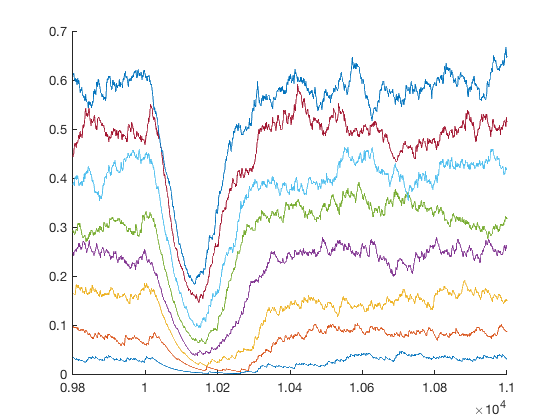

In [11]:
I_exc_gp = 30:10:100;
gAvg = [];
for i = 1:length(I_exc_gp)
    %Runs 3s simulation without any stimulus to measure steady-state values. 
    [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',I_exc_gp(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

    clear spk_snr spk_gp spk_str
    dt=0.0001; % 0.1ms integration steps
    g = [];
        parfor l =1:100
            [~, ~, ~,g_snr] = BGdelayline('stimCellsPer',50,'I_exc_snr',60,'I_exc_gp',I_exc_gp(i),...
                'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
            g = [g;g_snr];
        end
    gAvg = [gAvg;mean(g,1)];
end
figure
plot(gAvg')
xlim([0.98*10^4 1.1*10^4])

### How does g(t) in a SNr cell vary depending on strength of stimulus? 

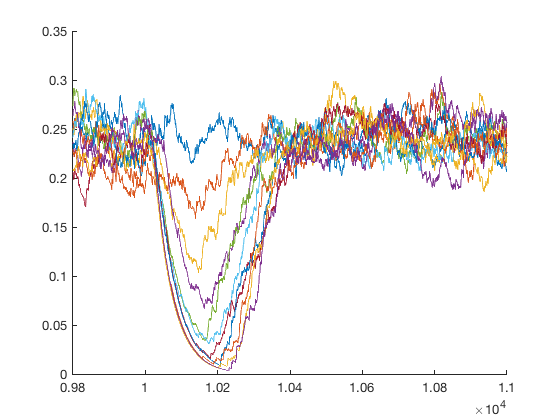

In [16]:
actLevel = 0:10:100;

for i = 1:length(actLevel)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

clear spk_snr spk_gp spk_str
dt=0.0001; % 0.1ms integration steps
g=[];
    parfor l =1:100
        [~,~,~,g_snr] = BGdelayline('stimCellsPer',actLevel(i),'I_exc_snr',60,'I_exc_gp',60,...
            'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        g = [g;g_snr];
    end
hold on
plot(mean(g,1))
end
xlim([0.98*10^4 1.1*10^4])